##  체질검사_회귀분석##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

%matplotlib inline

In [2]:
ds_health = pd.read_csv("실습파일/체질검사.csv", engine = 'python')
ds_health.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
# 파생변수 생성
ds_health['BMI'] = (ds_health['WEIGHT']*0.45)/((ds_health['HEIGHT']*2.54)/100)**2
ds_health.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


In [4]:
ds_health_y = ds_health["FAT"]
ds_health_x = ds_health.drop("FAT", axis = 1, inplace = False)

print("목표변수 데이터 크기: {}".format(ds_health_y.shape))
print("설명변수 데이터 크기: {}".format(ds_health_x.shape))

목표변수 데이터 크기: (252,)
설명변수 데이터 크기: (252, 14)


In [5]:
ds_health_x_const = sm.add_constant(ds_health_x)
ds_health_x_const.head()

,const,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,1.0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,1.0,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,1.0,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,1.0,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,1.0,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


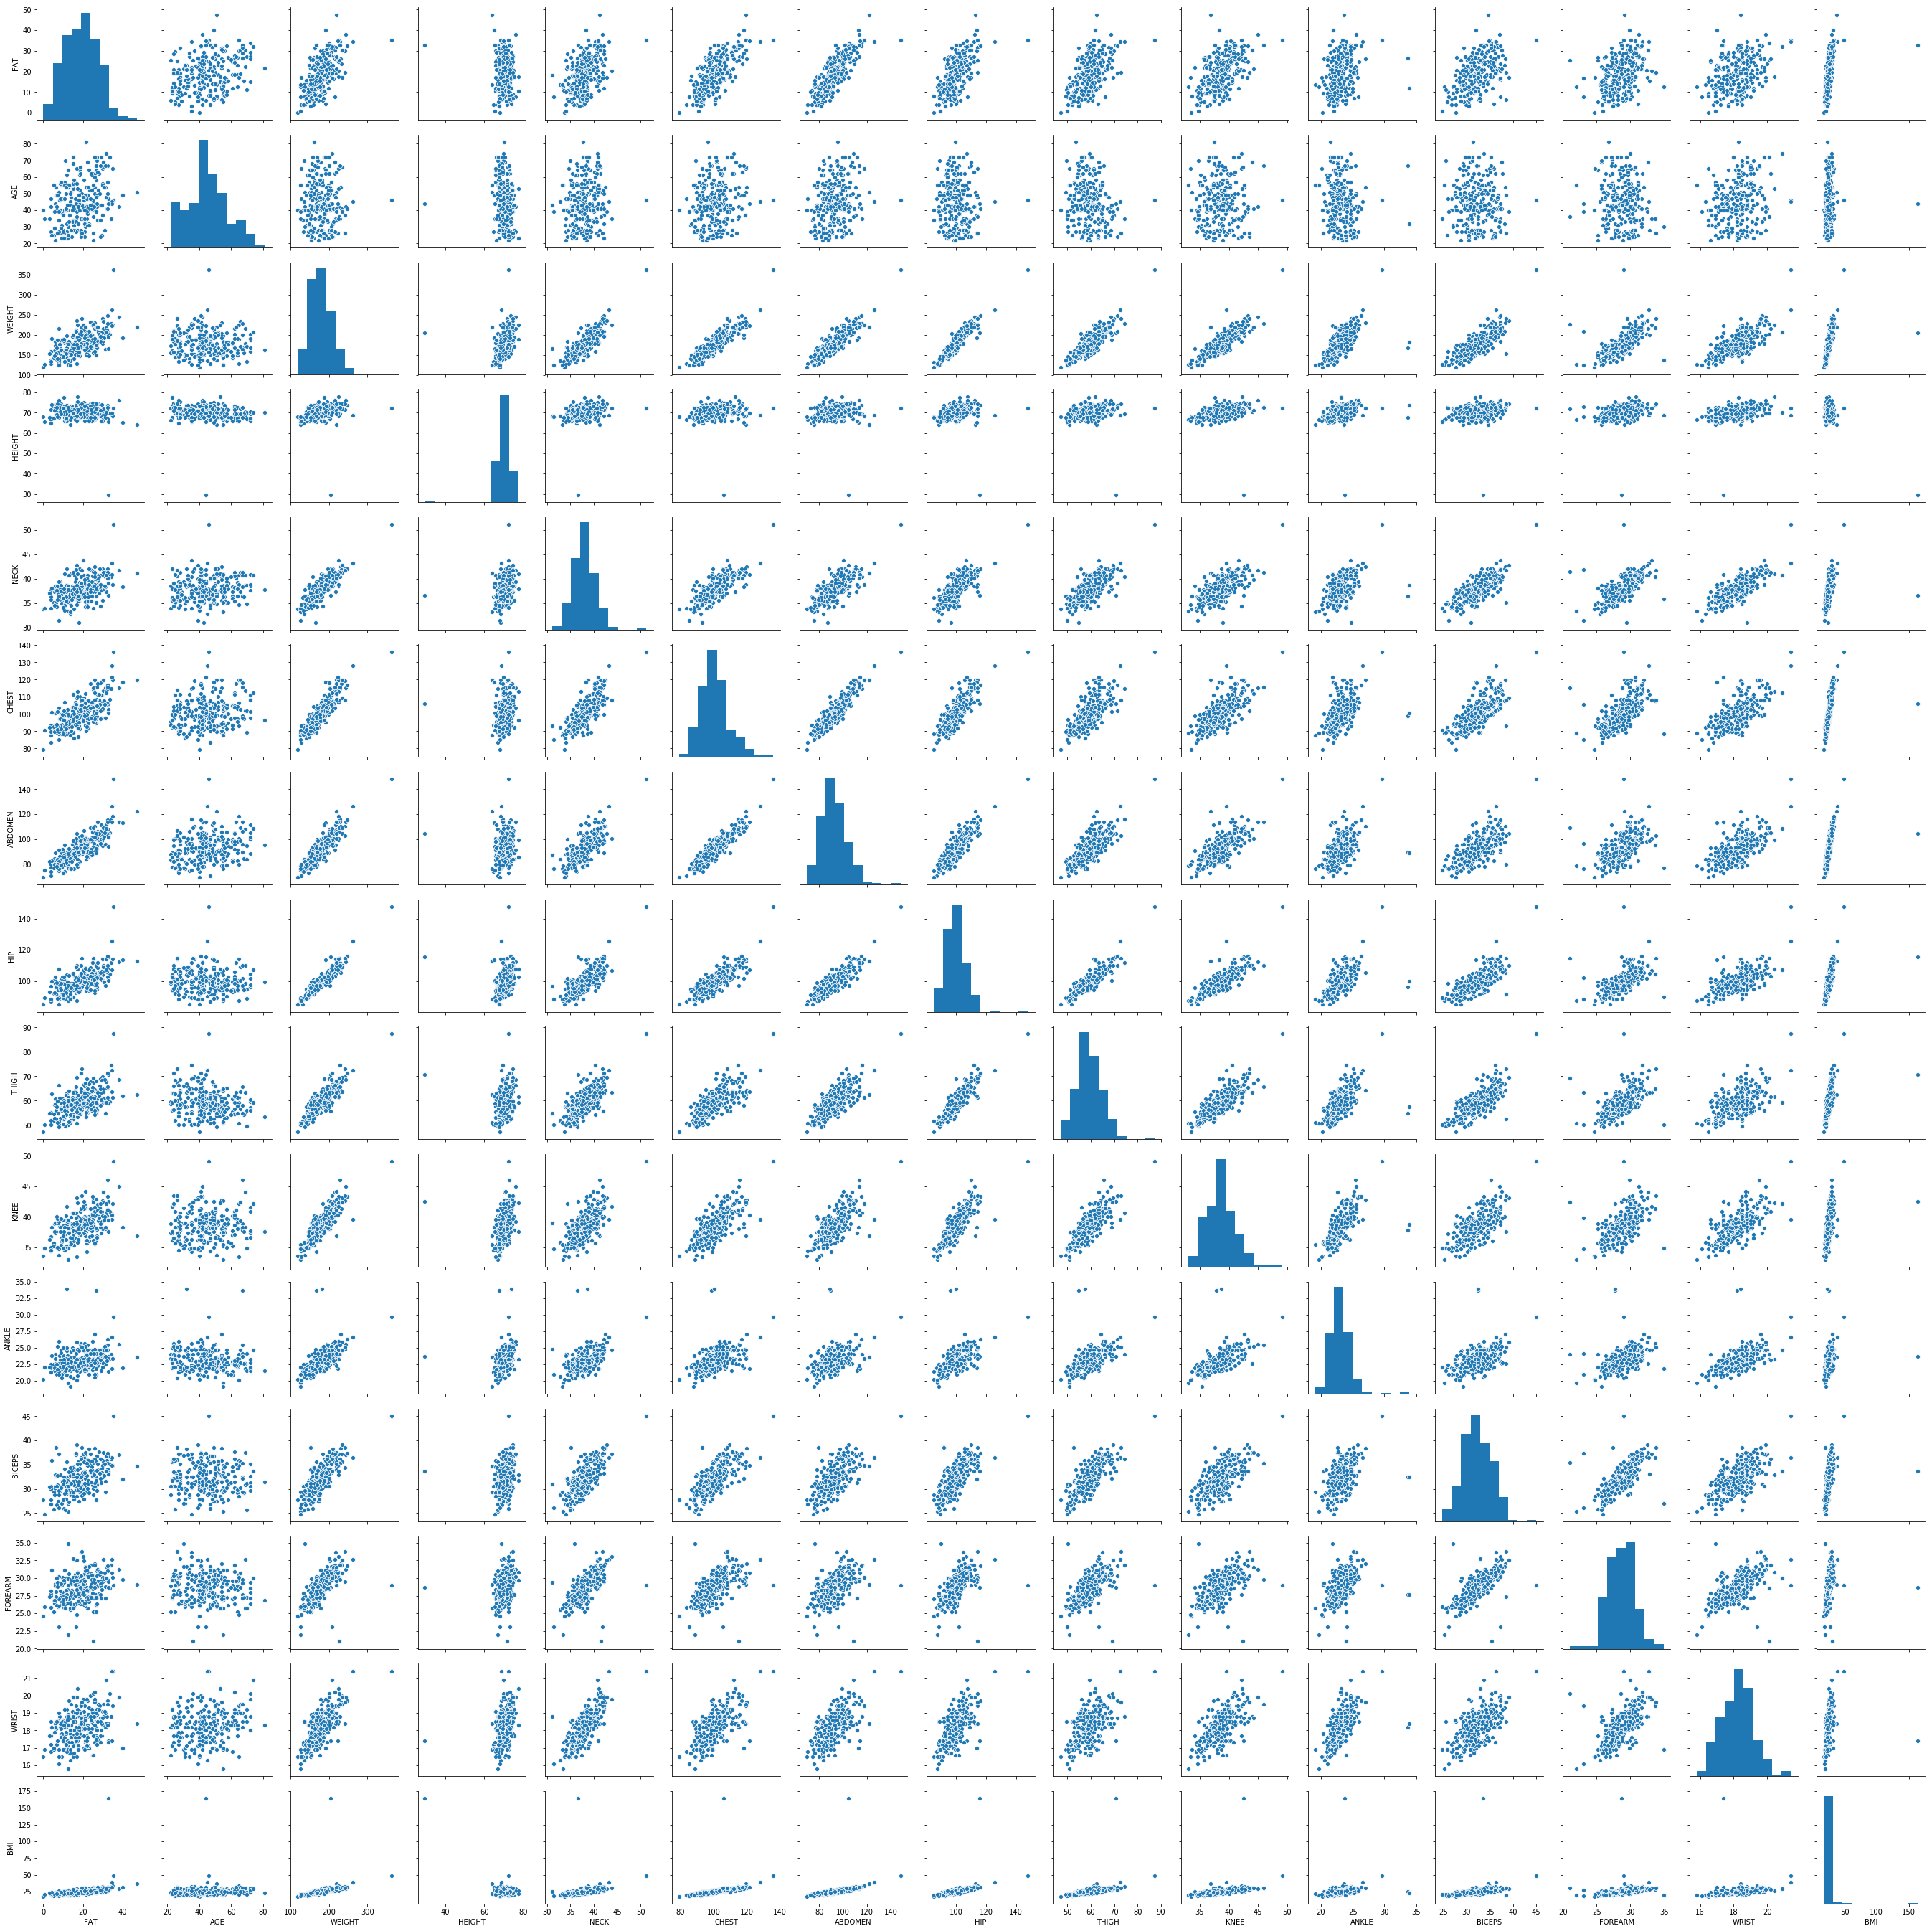

In [9]:
sns.pairplot(ds_health)

In [10]:
ds_health.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


In [6]:
reg_multi_model = sm.OLS(ds_health_y, ds_health_x_const)

reg_multi_results = reg_multi_model.fit()
print(reg_multi_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           5.49e-63
Time:                        14:04:17   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.2460     24.500     -0.990      0.3

In [7]:
ds_vif = pd.DataFrame()
ds_vif["variable"] = ds_health_x_const.columns
ds_vif["VIF"] = [variance_inflation_factor(ds_health_x_const.values, i) for i in range(ds_health_x_const.shape[1])]

ds_vif.sort_values("VIF", inplace = True)
ds_vif.round(3)

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


In [24]:
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select=5).fit(ds_health_x, ds_health_y)

selected_cols =ds_health_x.columns[rfe.support_]
removed_cols =ds_health_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS',
       'BMI'],
      dtype='object')


In [25]:
ds_health_x_rfe = sm.add_constant(ds_health_x_const[selected_cols])

reg_multi_rfe_model = sm.OLS(ds_health_y, ds_health_x_rfe)

reg_multi_rfe_results = reg_multi_rfe_model.fit()
print(reg_multi_rfe_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           4.38e-68
Time:                        14:05:30   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7037      6.231      0.434      0.6

In [26]:
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif["variable"] = ds_health_x_rfe.columns
ds_rfe_vif["VIF"] = [variance_inflation_factor(ds_health_x_rfe.values, i) for i in range(ds_health_x_rfe.shape[1])]
ds_rfe_vif.sort_values("VIF", inplace = True)
ds_rfe_vif.round(3)

,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


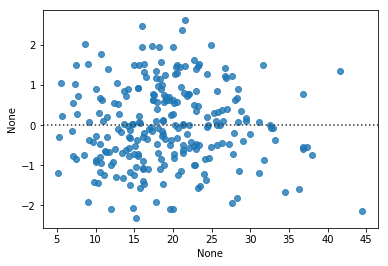

In [31]:
z = (reg_multi_rfe_results.resid - np.mean(reg_multi_rfe_results.resid))/np.std(reg_multi_rfe_results.resid)
sns.residplot(reg_multi_rfe_results.fittedvalues,z )

- 잔차가 등분산성을 가진 것으로 확인된다.

((array([-2.77656829, -2.4747255 , -2.30335476, -2.18099319, -2.0845634 ,
         -2.00433695, -1.93525503, -1.87433666, -1.81967137, -1.76995825,
         -1.72426993, -1.68192103, -1.64239011, -1.60527085, -1.5702402 ,
         -1.53703691, -1.50544658, -1.47529098, -1.44642028, -1.41870723,
         -1.39204287, -1.36633307, -1.34149598, -1.31745993, -1.29416181,
         -1.27154575, -1.249562  , -1.2281661 , -1.20731813, -1.1869821 ,
         -1.16712546, -1.14771863, -1.1287347 , -1.11014907, -1.0919392 ,
         -1.0740844 , -1.05656561, -1.03936522, -1.02246696, -1.00585573,
         -0.98951752, -0.97343927, -0.9576088 , -0.94201475, -0.92664647,
         -0.911494  , -0.89654796, -0.88179957, -0.86724053, -0.85286303,
         -0.83865971, -0.82462359, -0.81074809, -0.79702695, -0.78345425,
         -0.77002437, -0.75673195, -0.74357192, -0.73053942, -0.71762984,
         -0.70483876, -0.69216198, -0.67959546, -0.66713536, -0.65477799,
         -0.64251981, -0.63035742, -0.

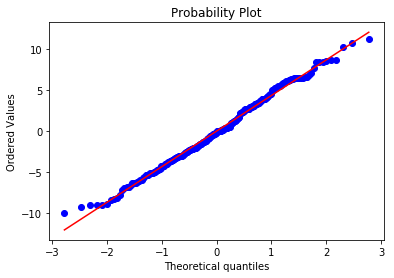

In [32]:
resid = reg_multi_rfe_results.resid
stats.probplot(resid, plot=plt)

- 잔차의 정규성을 만족함을 알 수 있다.

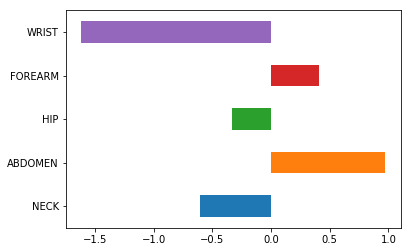

In [27]:
ds_reg_coef = pd.DataFrame({"Coef": reg_multi_rfe_results.params.values[1:]},
                           index = reg_multi_rfe_model.exog_names[1:])
ds_reg_coef.plot.barh(y = "Coef", legend = False)

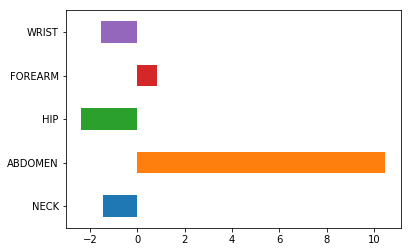

In [28]:
ds_health_x_scaled = scale(ds_health_x_const[selected_cols])

ds_health_x_scaled = sm.add_constant(ds_health_x_scaled)

reg_multi_scaled_model = sm.OLS(ds_health_y, ds_health_x_scaled)

reg_multi_scaled_results =reg_multi_scaled_model.fit()

ds_reg_scaled_coef = pd.DataFrame({"Coef": reg_multi_scaled_results.params.values[1:]},
                           index = reg_multi_rfe_model.exog_names[1:])
ds_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

- ABDOMEN 변수가 FAT에 가장 영향력이 큰 것을 알 수 있다.